# Mini Project 2: Logisitic Regression & Support Vector Machine

#### Team members:
- Harry Bhasin
- Oscar Padilla
- Najeeb Zaidi

##                    Breast Cancer Wisconsin (Diagnostic) Data Set
####  We used the breast cancer data set from UCI machine learning repository. The results of the dataset predict diagnosis (attribute 2) if its benign (B) or melignant (M). The data set has 569 records and 32 attributes. It is a multivariate data set and all the attributes are in real number. The results also show the sets are linearly separable using all 30 input features.

#### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.
#### The attributes describe characteristics of the cell nuclei present in the image.

#### Attribute Information:

#### 1.  ID number
#### 2.  Diagnosis (M = malignant, B = benign)
#### Ten real-valued features are computed for each cell nucleus:

#### 1.  radius (mean of distances from center to points on the perimeter)
#### 2.  texture (standard deviation of gray-scale values)
#### 3.  perimeter
#### 4.  area
#### 5.  smoothness (local variation in radius lengths)
#### 6.  compactness (perimeter^2 / area - 1.0)
#### 7.  concavity (severity of concave portions of the contour)
#### 8.  concave points (number of concave portions of the contour)
#### 9.  symmetry
#### 10.fractal dimension ("coastline approximation" - 1)

#### The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
#### All feature values are recoded with four significant digits. There are no missing attribute values. The class distribution is 357 benign and 212 melignant.

### 1. Here we load required libraries and load the data set using pandas.

In [2]:
import pandas as pd
import numpy as np
from __future__ import print_function

df = pd.read_csv('data/SVM_LR_data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. Data Preparation

### 2.1 Clean up

In [3]:
if 'id' in df: 
    del df['id']
if 'Unnamed: 32' in df: 
    del df['Unnamed: 32']

In [4]:
df['diagnosis'] = df.diagnosis == 'M'
df.diagnosis = df.diagnosis.astype(np.int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int32
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2.2 Data Visualization

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5]), <a list of 31 Text xticklabel objects>)

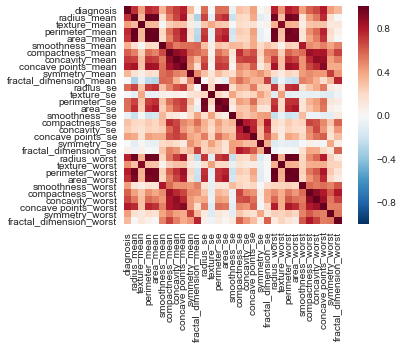

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# data set and correlation between the variables after cleaning and formatting it

cm = df.corr()
sns.heatmap(cm, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

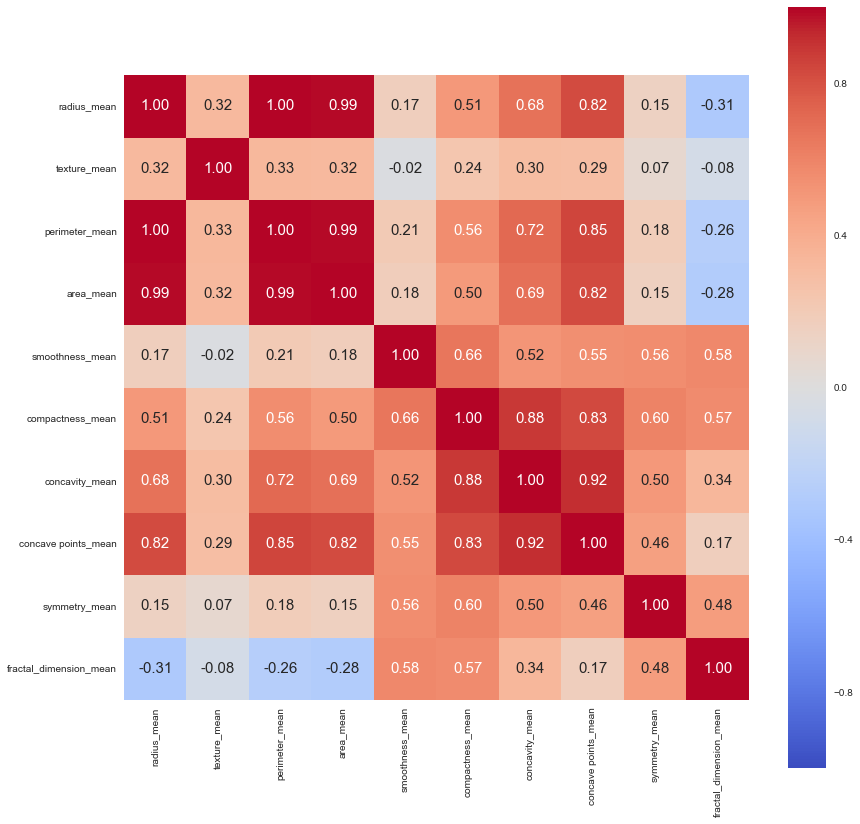

In [7]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

corr = df[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

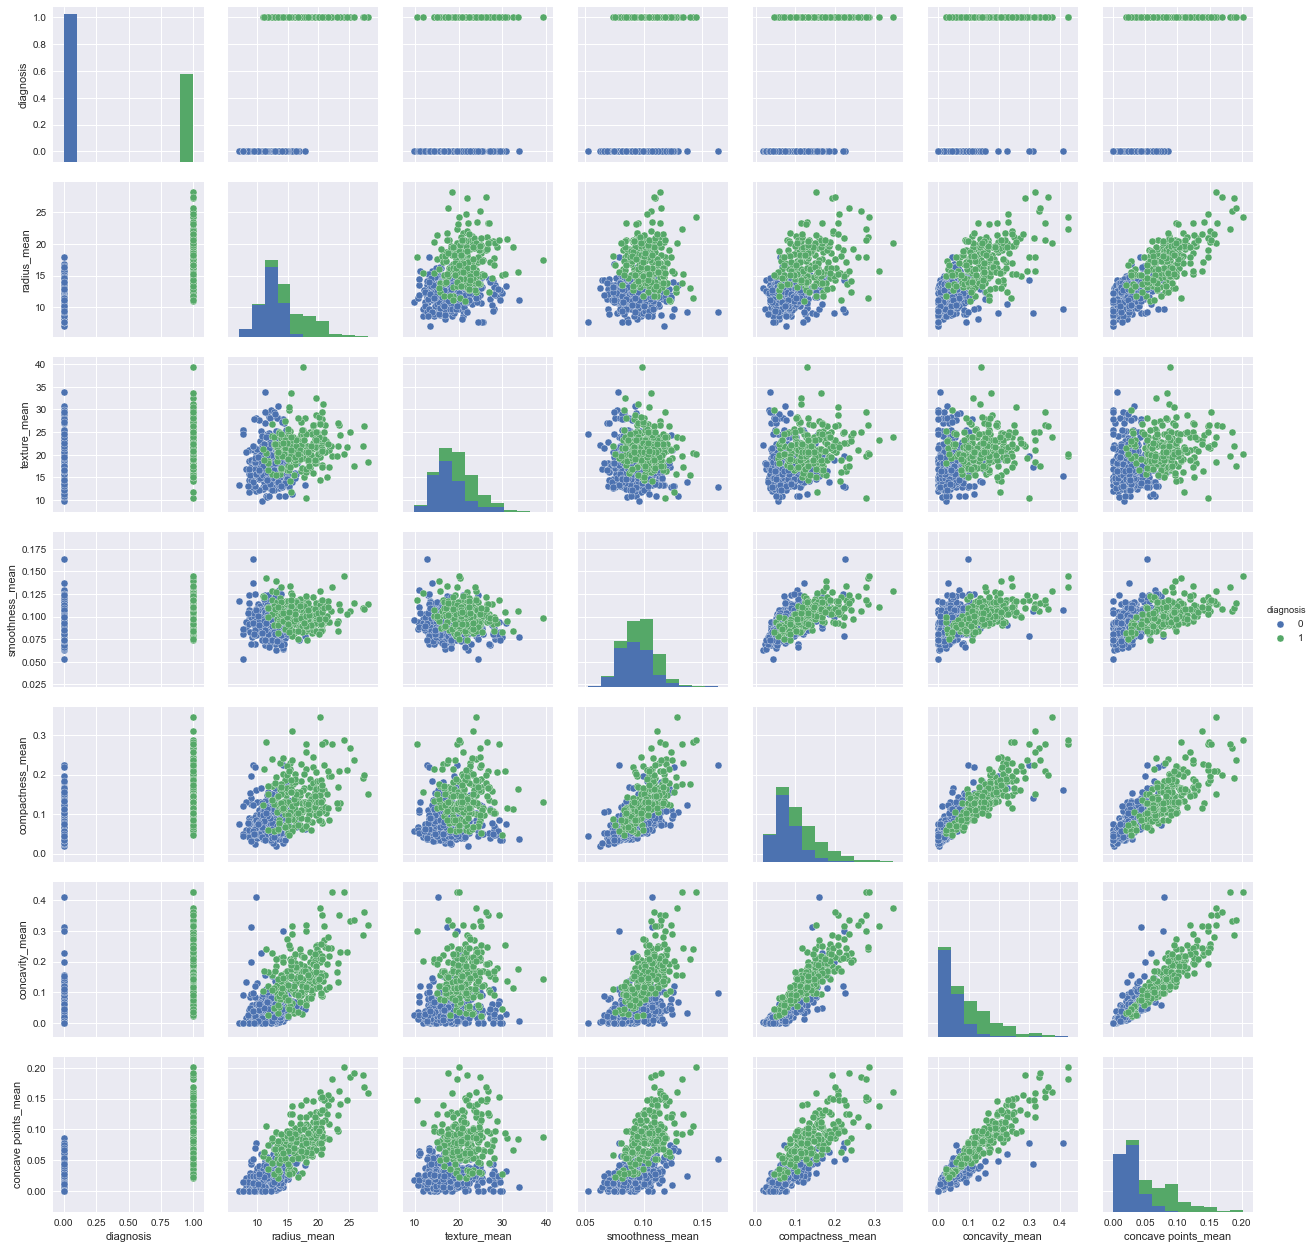

In [8]:
selected_features = ['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
g = sns.pairplot(df[selected_features], hue = 'diagnosis')

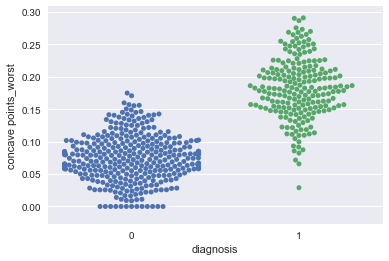

In [9]:
sns.swarmplot(x = 'diagnosis', y = 'concave points_worst', data = df)

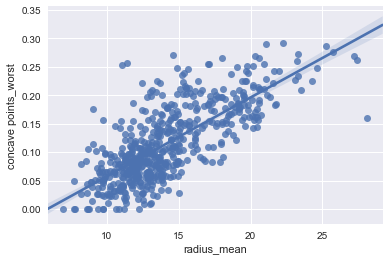

In [10]:
sns.regplot(x = 'radius_mean', y = 'concave points_worst', data = df, scatter = True)

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


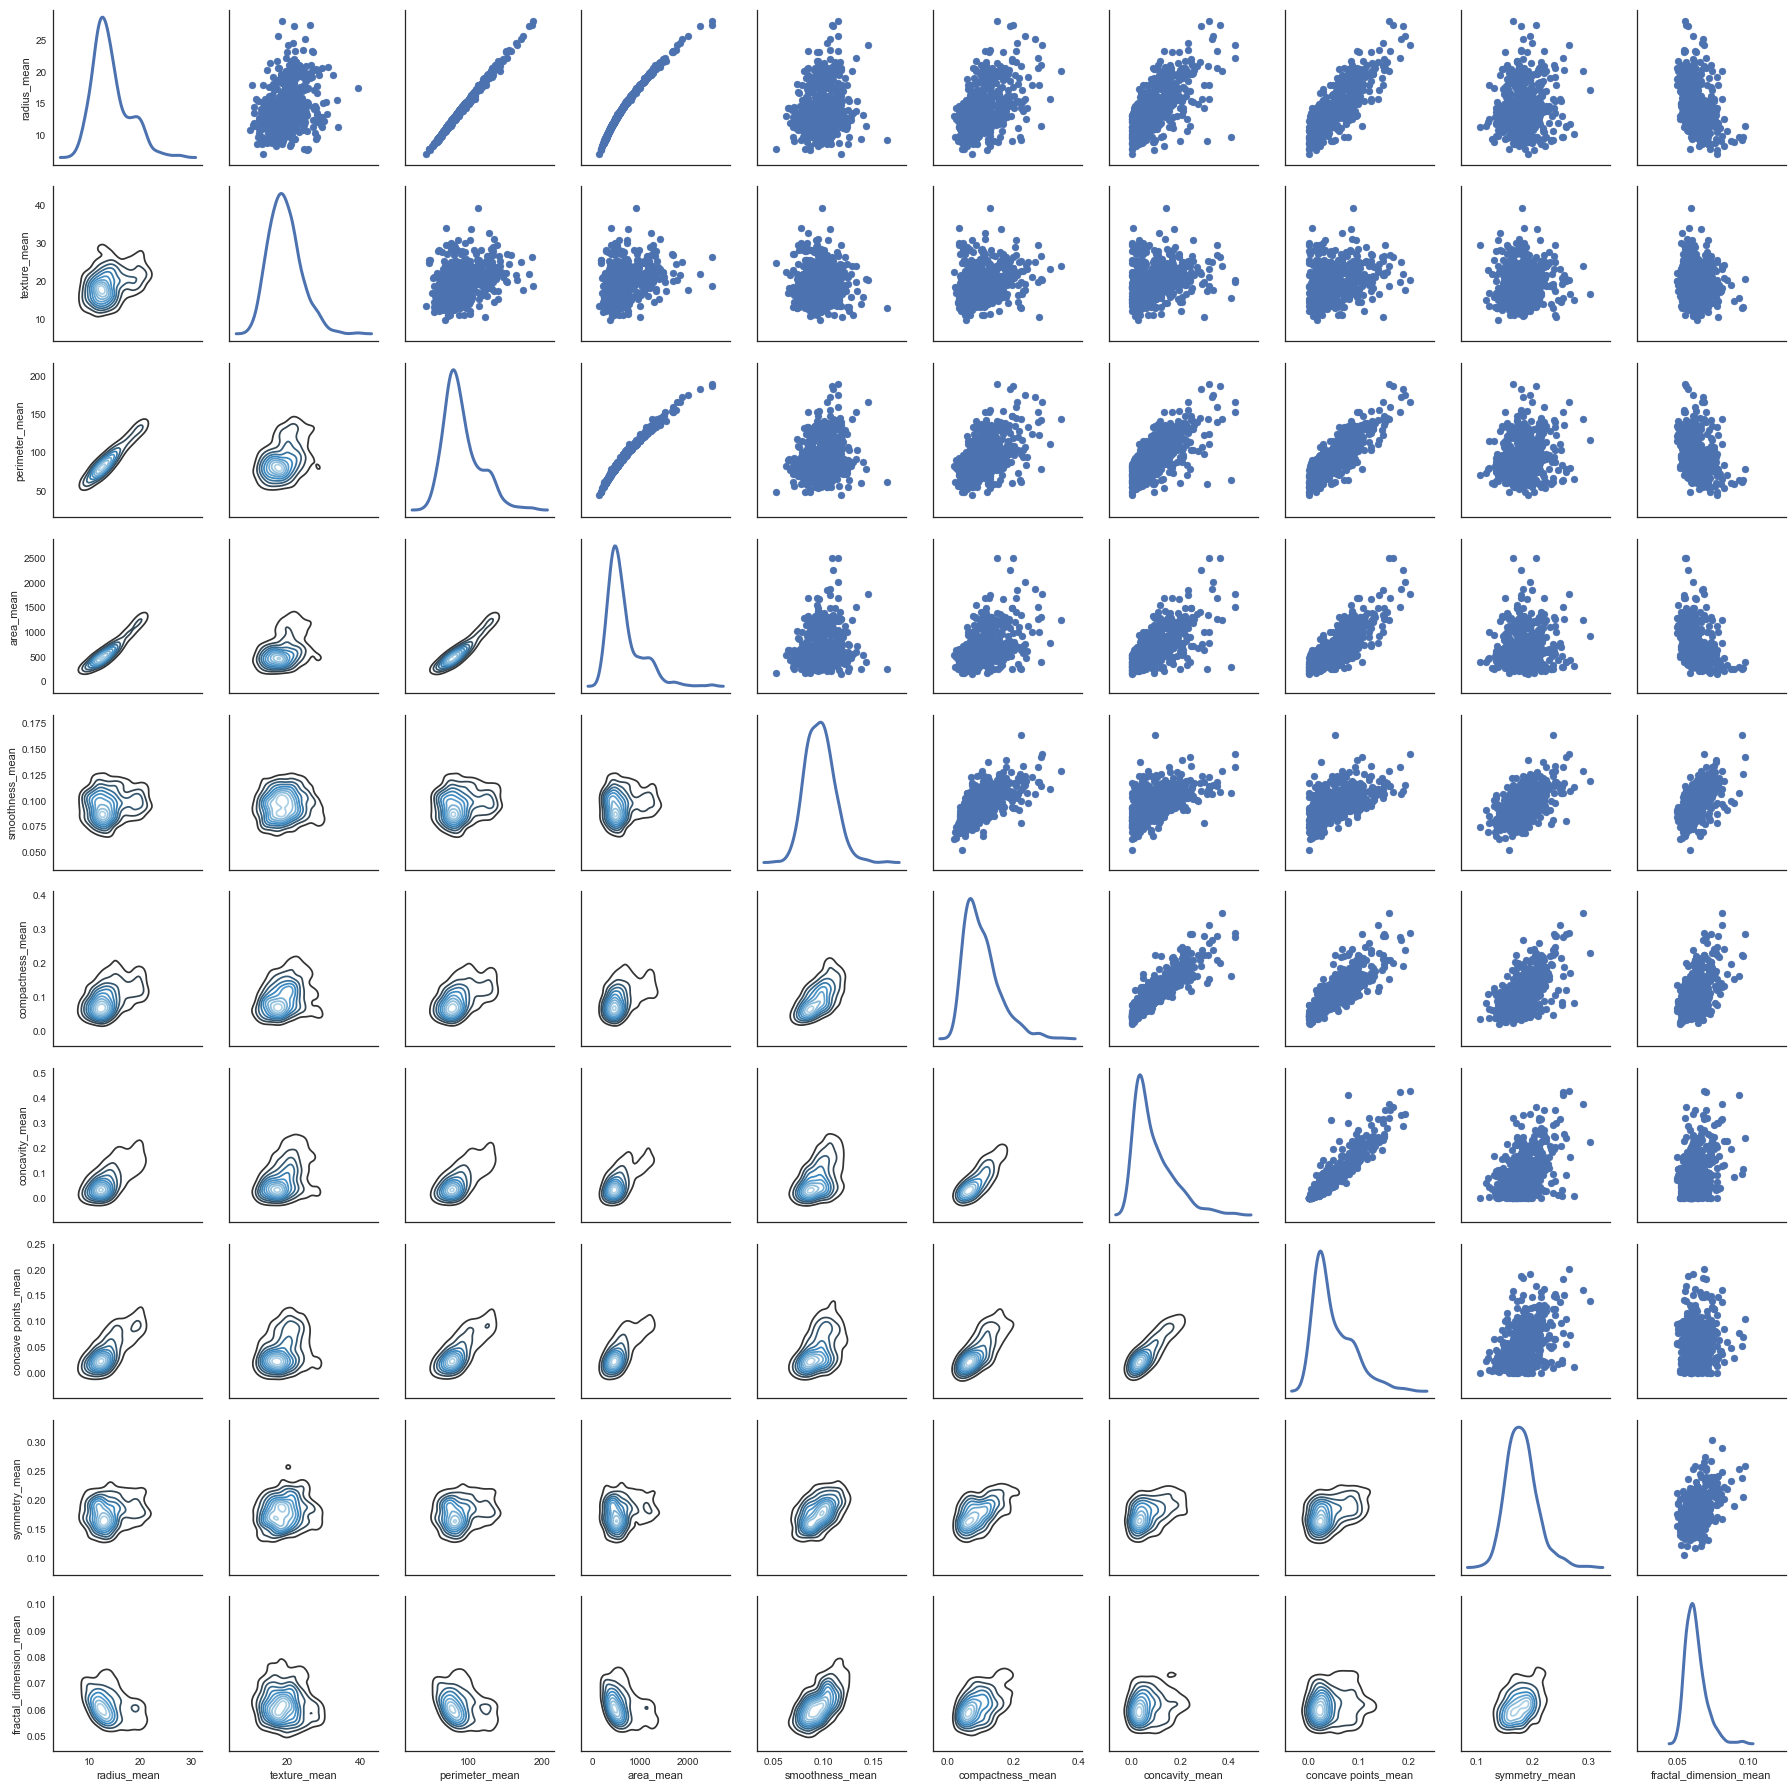

In [11]:
sns.set(style="white")

g = sns.PairGrid(df[features_mean], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### 2.3 Training and Testing Split

In [12]:
from sklearn.model_selection import ShuffleSplit

if 'diagnosis' in df:
    y = df['diagnosis'].values
    X = df.ix[:, df.columns != 'diagnosis'].values

In [13]:
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


### 2.4 PCA

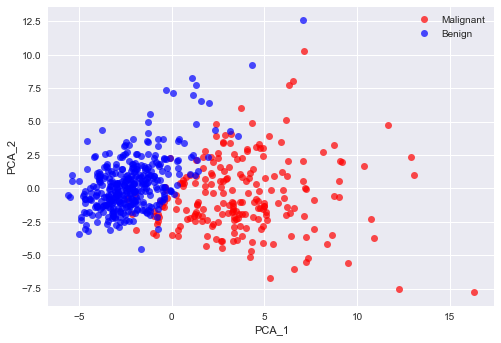

In [33]:
from sklearn.decomposition import PCA

df_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca.fit(df_std)
TwoD_Data = pca.transform(df_std)
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = TwoD_Data[:,0]
PCA_df['PCA_2'] = TwoD_Data[:,1]


plt.plot(PCA_df['PCA_1'][df.diagnosis == 1],PCA_df['PCA_2'][df.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 0],PCA_df['PCA_2'][df.diagnosis == 0],'o', alpha = 0.7, color = 'b')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])

## 3. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

iter_num=0

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
    
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.947368421053
confusion matrix
 [[68  4]
 [ 2 40]]
====Iteration 1  ====
accuracy 0.982456140351
confusion matrix
 [[78  1]
 [ 1 34]]
====Iteration 2  ====
accuracy 0.964912280702
confusion matrix
 [[76  2]
 [ 2 34]]


In [35]:
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T, df.ix[:, df.columns != 'diagnosis'].columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.982456140351
[[78  0]
 [ 2 34]]
fractal_dimension_mean has weight of -0.198832524437
fractal_dimension_se has weight of -0.155669599719
compactness_se has weight of -0.124275266604
texture_se has weight of -0.086768949523
concavity_se has weight of -0.0433540831302
symmetry_se has weight of -0.0383694762413
compactness_mean has weight of 0.0460561968482
concave points_se has weight of 0.0537961486596
smoothness_se has weight of 0.0552253310674
smoothness_mean has weight of 0.077442250813
symmetry_mean has weight of 0.101530817235
fractal_dimension_worst has weight of 0.130518904706
compactness_worst has weight of 0.15768563571
perimeter_se has weight of 0.208304405913
radius_se has weight of 0.26559592591
area_se has weight of 0.266098927536
concavity_mean has weight of 0.291671067723
concavity_worst has weight of 0.297505525491
texture_mean has weight of 0.307578942424
smoothness_worst has weight of 0.329015080082
perimeter_mean has weight of 0.339837296525
area_mean has w

In [36]:
radius = np.linspace(min(X.PCA_1), max(X.PCA_2), 100)
line = (-lr_clf.coef_[0][0]/lr_clf.coef_[0][1])*radius + np.ones(len(radius))*(-lr_clf.intercept_/lr_clf.coef_[0][1])

plt.plot(radius,line)
plt.plot(PCA_df['PCA_1'][df.diagnosis == 1],PCA_df['PCA_2'][df.diagnosis == 1],'o', alpha = 0.7)
plt.plot(PCA_df['PCA_1'][df.diagnosis == 0],PCA_df['PCA_2'][df.diagnosis == 0],'o', color = 'b', alpha = 0.7)
plt.legend(['Decision Line','Malignant','Benign'])
plt.title('Logistic Regression. Accuracy:' + str(acc)[0:4])
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

AttributeError: 'numpy.ndarray' object has no attribute 'PCA_1'

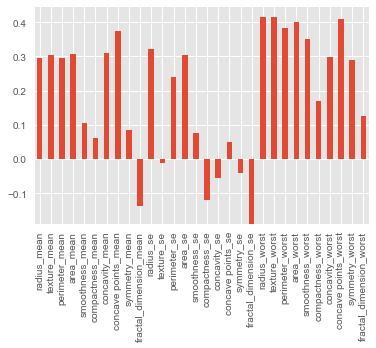

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0], index = df.ix[:, df.columns != 'diagnosis'].columns)
weights.plot(kind = 'bar')
plt.show()

In [19]:
X_train_scaled.shape

(455L, 30L)

In [20]:
predictor_var = ['radius_mean','area_worst','perimeter_worst','compactness_se','fractal_dimension_se']

X_train_selected = X_train_scaled[:, [1, 24, 23, 16, 20]]
X_test_selected = X_test_scaled[:, [1, 24, 23, 16, 20]]

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_selected,y_train)  # train object

y_hat = lr_clf.predict(X_test_selected) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T, df[predictor_var].columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.956140350877
[[73  1]
 [ 4 36]]
compactness_se has weight of 0.281634229743
radius_mean has weight of 0.524178106674
area_worst has weight of 0.76918345321
perimeter_worst has weight of 1.06593662112
fractal_dimension_se has weight of 1.18397763787


## 4. Support Vector Machines 

In [21]:
for train_indices, test_indices in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.964912280702
[[72  0]
 [ 4 38]]


In [23]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(37L, 30L)
(37L,)
[17 20]


[[ 0.23802311  0.50715908  0.26160289  0.30253443  0.09791441 -0.20115669
   0.89876693  0.68280231  0.31994242 -0.36686509  0.52474289 -0.43492005
   0.40902037  0.68880063  0.24902304 -0.43152958 -0.05744501  0.17898601
  -0.31701116 -0.41036271  0.28775219  0.65582471  0.32210495  0.42892159
   0.41760782 -0.28305937  0.492294    0.35194196  0.58437519  0.21051103]]


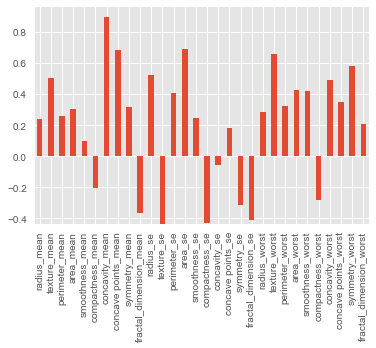

In [24]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0], index = df.ix[:, df.columns != 'diagnosis'].columns)
weights.plot(kind = 'bar')

In [25]:
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 225 to 197
Data columns (total 31 columns):
diagnosis                  37 non-null int32
radius_mean                37 non-null float64
texture_mean               37 non-null float64
perimeter_mean             37 non-null float64
area_mean                  37 non-null float64
smoothness_mean            37 non-null float64
compactness_mean           37 non-null float64
concavity_mean             37 non-null float64
concave points_mean        37 non-null float64
symmetry_mean              37 non-null float64
fractal_dimension_mean     37 non-null float64
radius_se                  37 non-null float64
texture_se                 37 non-null float64
perimeter_se               37 non-null float64
area_se                    37 non-null float64
smoothness_se              37 non-null float64
compactness_se             37 non-null float64
concavity_se               37 non-null float64
concave points_se          37 non-null float64
sym

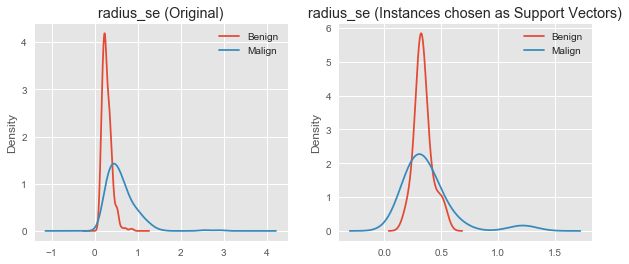

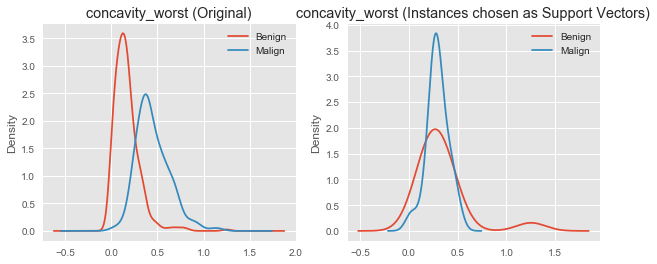

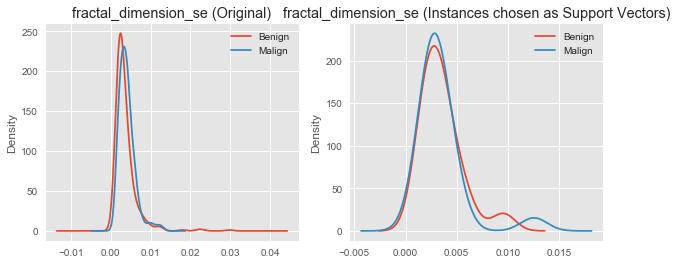

In [26]:
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['diagnosis'])
df_grouped = df.groupby(['diagnosis'])

# plot KDE of Different variables
vars_to_plot = ['radius_se','concavity_worst', 'fractal_dimension_se']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
        
    # plot original distributions
    plt.subplot(1,2,1)
    ax = df_grouped[v].plot.kde()
    plt.legend(['Benign','Malign'])
    plt.title(v+' (Original)')
    
    # plot support vector stats
    plt.subplot(1,2,2)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Benign','Malign'])
    plt.title(v+' (Instances chosen as Support Vectors)')

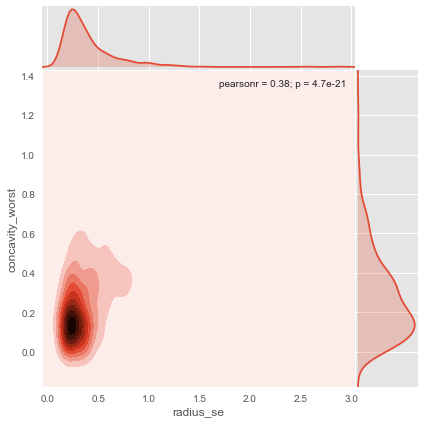

In [27]:
g = sns.jointplot("radius_se", "concavity_worst", data = df, kind = "kde", space = 0, hue = "diagnosis")

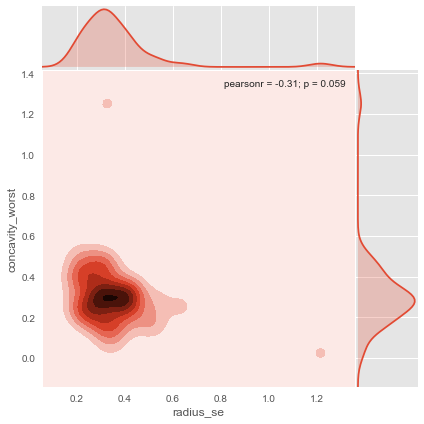

In [28]:
g = sns.jointplot("radius_se", "concavity_worst", data = df_support, kind = "kde", space = 0, hue = "diagnosis")

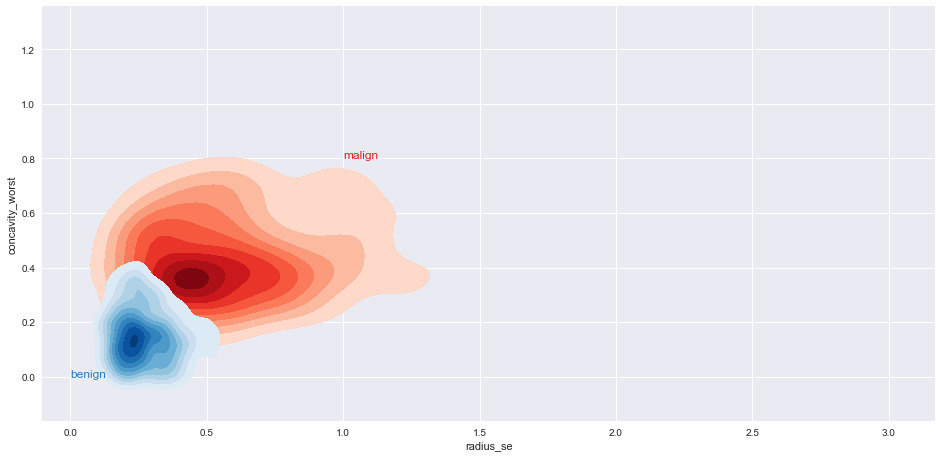

In [29]:
sns.set(style="darkgrid")

malign = df.query("diagnosis == 1")
benign = df.query("diagnosis == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(malign.radius_se, malign.concavity_worst,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(benign.radius_se, benign.concavity_worst,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(0, 0, "benign", size=12, color=blue)
ax.text(1, 0.8, "malign", size=12, color=red)

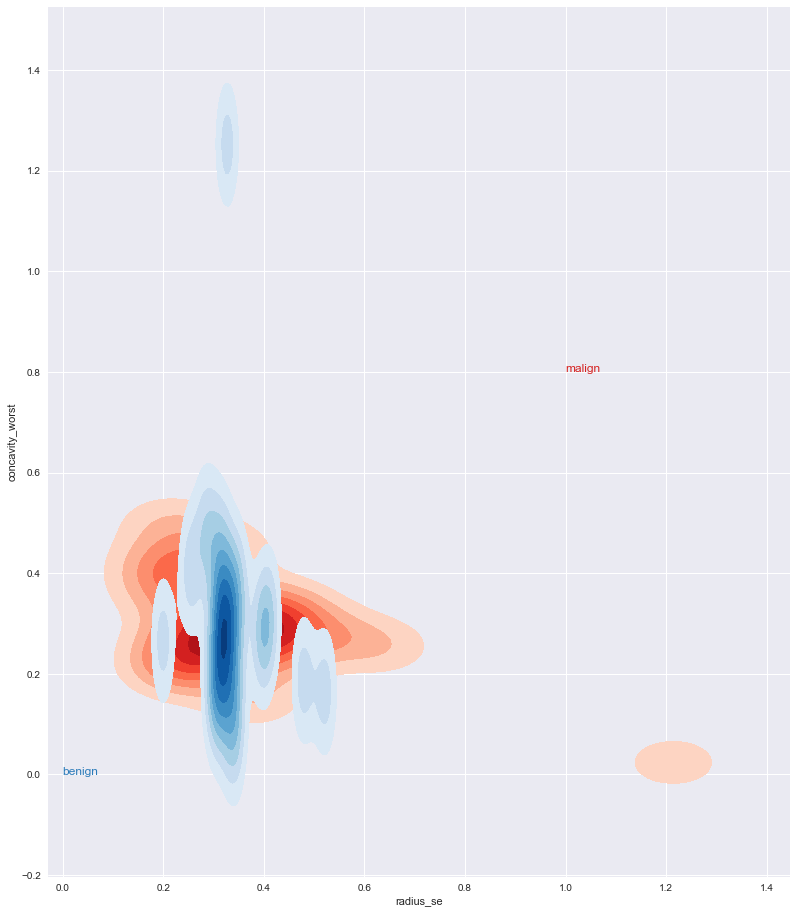

In [30]:
sns.set(style="darkgrid")

malign = df_support.query("diagnosis == 1")
benign = df_support.query("diagnosis == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(malign.radius_se, malign.concavity_worst,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(benign.radius_se, benign.concavity_worst,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(0, 0, "benign", size=12, color=blue)
ax.text(1, 0.8, "malign", size=12, color=red)

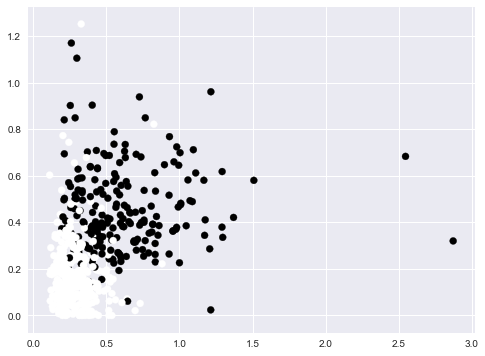

In [31]:
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(df.radius_se, df.concavity_worst, c=df.diagnosis.astype(np.float))
plt.show()

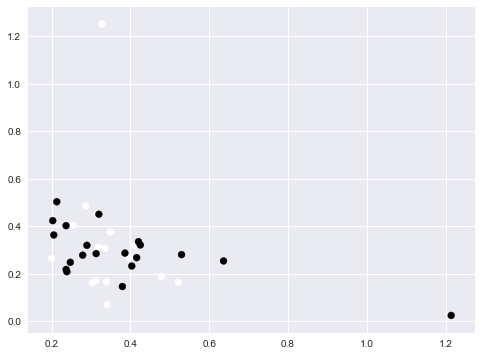

In [32]:
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(df_support.radius_se, df_support.concavity_worst, c=df_support.diagnosis.astype(np.float))
plt.show()